# Simulating Student's t-distribution with MCMC/Metropolis dependent sampling algorithm

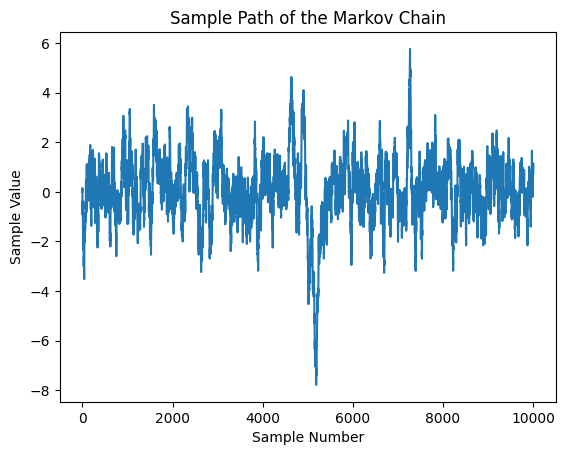

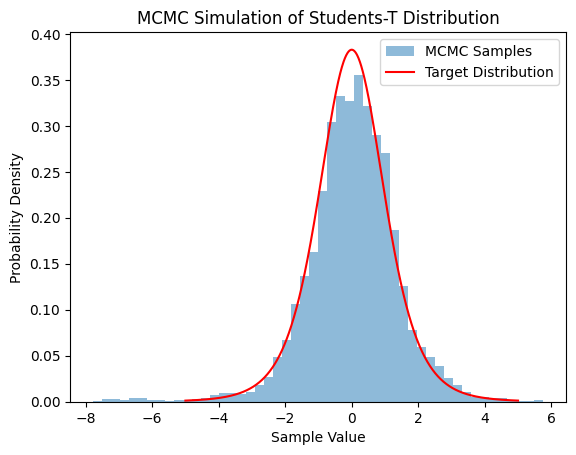

In [ ]:
# Import Python libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Fixing the random seed so results can be reproduced
np.random.seed(155)

# Define the target distribution - Student's t-distribution with 6 degrees of freedom.
# Use location=0 and scale=1 parameters which are the default values of the Student's t-distribution
# x is any continuous variable
def target(x):
    return stats.t.pdf(x, df=6)

# Define the proposal distribution (uniform distribution)
def proposal(x):
    # Returns random sample between x-0.5 and x+0.5 of the current value
    return stats.uniform.rvs(loc=x-0.5, scale=1)

# Set the initial state arbitrarily at 0 and set the number of iterations to 10,000
x0 = 0
n_iter = 10000

# Initialize the Markov chain and the samples list
x = x0
samples = [x]

# Run the Metropolis algorithm to generate new samples and store them in the 'samples' list
for i in range(n_iter):
    # Generate a proposed state from the proposal distribution
    x_proposed = proposal(x)

    # Calculate the acceptance ratio
    acceptance_ratio = target(x_proposed) / target(x)

    # Accept or reject the proposed state
    if acceptance_ratio >= 1:
        # Accept new sample
        x = x_proposed
    else:
        u = np.random.rand()
        # Reject new sample
        if u < acceptance_ratio:
            x = x_proposed

    # Add the current state to the list of samples
    samples.append(x)

# Plot the sample path of the Markov chain
plt.plot(samples)
plt.xlabel('Sample Number')
plt.ylabel('Sample Value')
plt.title('Sample Path of the Markov Chain')
plt.show()

# Plot the histogram of the samples and compare it with the target distribution
plt.hist(samples, bins=50, density=True, alpha=0.5, label='MCMC Samples')
x_range = np.linspace(-5, 5, 1000)
plt.plot(x_range, target(x_range), 'r-', label='Target Distribution')
plt.xlabel('Sample Value')
plt.ylabel('Probability Density')
plt.title('MCMC Simulation of Students-T Distribution')
plt.legend()
plt.show()